## Computational Neuroscience Assignment 5

### Authors:
* Jochem Beurskens s4637801
* Kirina van der Bijl S1061566
* Arne Diehl S4451392

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy as sp
import networkx as nx
from scipy import optimize, integrate
import matplotlib.ticker as ticker
from mpl_toolkits import mplot3d
import sys

## 1.a.1 
As shown in the Gielen lectures the Fischer information for a Poisson distributed spiking system can be given by $ I_{F}(\theta_{s}) = T* \sum_{i=1}^{N} \dfrac{(f'_{i}(\theta_{s}))^2}{f_{i}(\theta_{s})} $. And for the given tuning function $f_i$ it can be calculated for a given amount of neurons $N$.

$ I_{F}(\theta_{s}) = T* \sum_{i=1}^{N} \dfrac{(f'_{i}(\theta_{s}))^2}{f_{i}(\theta_{s})} = T* \sum_{i=1}^{N} \dfrac{(\dfrac{-(\theta_{s}-\theta_{i})}{\sigma^2}*exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2}))^2}{exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2})} = T* \sum_{i=1}^{N} (\dfrac{-(\theta_{s}-\theta_{i})}{\sigma^2})^{2}*exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2}) $

Now we can look at the derivatives of the above, if we then set this derivative equal to 0 we should be able to obtain the maxima or minima of the functions. Notice that in this case multiple maxima and minima occur, thus after the points where the derivative equals 0 have been found they should be checked to see what the global maxima are.
Now the derivative, we have a sum in our function but luckily this is a well behaved function and thus we have the nice property that the derivative of the sum is the sum of individual derivatives.

$ \dfrac{d I_{F}(\theta_{s})}{d\theta_s} = T* \sum_{i=1}^{N} \dfrac{d \left((\dfrac{-(\theta_{s}-\theta_{i})}{\sigma^2})^{2}*exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2}) \right)}{d\theta_s} = T * \sum_{i=1}^{N} \dfrac{1}{\sigma^4} * ((\theta_{s}-\theta_{i}) \left( 2*exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2}) - (\theta_{s}-\theta_{i})^2 * \dfrac{exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2})}{\sigma^2} \right) )= 0 \rightarrow $

$ T * \sum_{i=1}^{N} \dfrac{1}{\sigma^4} * (\theta_{s}-\theta_{i}) = 0 \rightarrow \theta_s = \sum_{i=1}^{N}\dfrac{\theta_i}{N} $ or

$\left( 2*exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2}) - (\theta_{s}-\theta_{i})^2 * \dfrac{exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2})}{\sigma^2}) \right) = 0 \rightarrow (\theta_{s}-\theta_{i}) = \pm \sqrt{2} *\sigma \rightarrow \theta_{s} = \left( \pm \sqrt{2} *\sigma + \theta_i \right)$ for each $\theta_i$ that correspond to one neuron, thus when looking at a group of neurons one adds the individual curves together and you get: $ \theta_s = (\pm \sqrt{2} *\sigma + \sum_{i=1}^{N}\theta_i) /N $. Next to the above two solutions we also expect two solutions arising from the exponentials, but these will assymptotically approach 0 and thus never reach it and are therefore only theoretical solutions that we will not observe (as these require $theta_s \rightarrow \infty$).  Now we can verify this, easily, for the case of 1 neuron, with a chosen $\theta_i$, $T$, and $\sigma$:


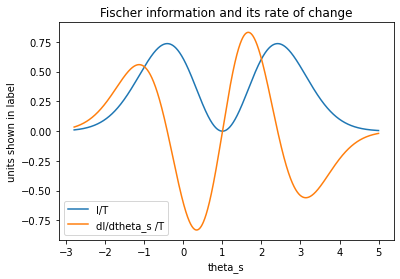

/Users/arnediehl/opt/anaconda3/envs/nips/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


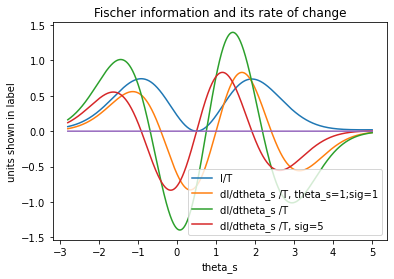

In [11]:
sig=1 #defining sigma
theta_i = 1 #defining theta_i (or the preferred stimulus orientation)
sig2 = 1
theta_i2 = .5
sig3 = 1
theta_i3 = 1
sig4=5
theta_i4=1
theta_s = np.linspace(-2.8,5,1000000) 

def dI(p,sig,s):
  subpart1 = (s-p) 
  subpart2 = np.exp(-subpart1**2/(2*sig**2))
  I = (subpart1**2/(sig**4)) * subpart2 
  der = (subpart1/(sig**4)) * (2*subpart2-(subpart2/sig**2) * subpart1**2) 
  return I, der 
der_array = dI(theta_i, sig, theta_s)[1]

plt.figure(1)
plt.title('Fischer information and its rate of change')
plt.ylabel('units shown in label')
plt.xlabel('theta_s')
plt.plot(theta_s, dI(theta_i, sig, theta_s)[0], label='I/T')
plt.plot(theta_s, dI(theta_i, sig, theta_s)[1], label='dI/dtheta_s /T')
plt.legend()
#find indeed 3 points at theta_i and sqrt(2)+/-theta_i, also see that the maxima/minima are correctly placed
plt.figure(2)
plt.title('Fischer information and its rate of change')
plt.ylabel('units shown in label')
plt.xlabel('theta_s')
plt.plot(theta_s, dI(theta_i4, sig4, theta_s)[0]+dI(theta_i2, sig2, theta_s)[0], label='I/T')
plt.plot(theta_s, dI(theta_i, sig, theta_s)[1], label='dI/dtheta_s /T, theta_s=1;sig=1')
plt.plot(theta_s, dI(theta_i3, sig3, theta_s)[1]+dI(theta_i2, sig2, theta_s)[1], label='dI/dtheta_s /T')
plt.plot(theta_s, dI(theta_i4, sig4, theta_s)[1]+dI(theta_i2, sig2, theta_s)[1], label='dI/dtheta_s /T, sig=5')
plt.plot(theta_s, np.zeros(np.size(theta_s)))
plt.legend()
#also in this case the zeros of the derivative agree with the calculated values, there also seems to be a sigma dependency

## 1.a.2
The above graphs indicate that the fisher information is not highest when the preferred stimulus and the stimulus are the same, but rather when they are different from each other. In the example above for the blue line for example we have two points where the fisher information is maximal, $\theta_s=-1$ and $\theta_s=2$. So those orientions can be measured best.

## 1.b
We can use 3.45 from the Dayan & Abott book to obtain the Fischer information in this case, recognising that we have a stimulus orientation $\theta_{s}$ rather than just a stimulus parameter $s$.

$ I_{F}(\theta_{s}) = T* \sum_{i=1}^{N} \dfrac{(f'_{i}(\theta_{s}))^2}{f_{i}(\theta_{s})} $

In the above we can simply plug in the given tuning function: $ f_{i}(\theta_{s}) = exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2}) $. This gives us the Fisscher information as it is expected from a cluster of $N$ neurons with the given tuning function. However, we want to approach the limit of a very large number of neurons with a large distribution of prefered orientations ($\Delta\theta_{i}>>\sigma$). This allows for the approximmation of the behaviour by an integral over the preferred orientations, running from $-\infty$ to $+\infty$. Notice that for this to work the integral has to be multiplied by a forefactor $\rho_s$ that represents the density of the neurons in the orientation space (as in the sum you sum over neurons but we approximate with an integral over orientations, thus going from orientations to number of neurons requires multiplication with a density). Now we can perform the integration:

$ I_{F}(\theta_{s}) = T* \sum_{i=1}^{N} \dfrac{(f'_{i}(\theta_{s}))^2}{f_{i}(\theta_{s})} = T* \sum_{i=1}^{N} \dfrac{(\dfrac{-(\theta_{s}-\theta_{i})}{\sigma^2}*exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2}))^2}{exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2})} = T* \sum_{i=1}^{N} (\dfrac{-(\theta_{s}-\theta_{i})}{\sigma^2})^{2}*exp(\dfrac{-(\theta_{s}-\theta_{i})^2}{2*\sigma^2}) \approx T*\rho_s*\int_{-\infty}^{+\infty} (\dfrac{-(\theta_{s}-\theta)}{\sigma^2})^{2}*exp(\dfrac{-(\theta_{s}-\theta)^2}{2*\sigma^2})d\theta$

Now in this final integral we recognise the form of a standard integral (by first substituting $u=\theta - \theta_s\rightarrow du=d\theta$): 

$T*\rho_s*\dfrac{1}{\sigma^4}\int_{-\infty}^{+\infty} u^2 * exp(\dfrac{-u^2}{\sigma^2})du = T*\rho_s*\dfrac{1}{\sigma^4}\int_{-\infty}^{+\infty} u^2 * exp(-a*u^2)du = T*\rho_s*\dfrac{1}{\sigma^4} *\dfrac{1}{2}* \sqrt{\dfrac{\pi}{a^3}} = T*\rho_s*\dfrac{1}{\sigma^4}* \dfrac{1}{2}*\sqrt{\pi*2^3*\sigma^6}=\dfrac{T*\rho_s}{\sigma}* \sqrt{\pi*2}$

From this we clearly see: $I_{F} \propto \dfrac{1}{\sigma}$

## 1.c
We see that the Fischer information goes as $1/\sigma^4$ times the terms containing the preferred and the other orientation and the exponential (which also contains a $\sigma$. Thus the Fischer information, for fixed N and fixed other parameters, depends heavily on $\sigma$. At the same time the coverage of the orientations by the neurons should not be reduced to 0, which is expected to be the optimal case for the above, thus we have a trade off between the coverage and the maximalisation of the Fischer information. We do not want the number coverage of te neurons to be close to 0 as then in the sum for a particular orientation there will not be any neurons that have reacted (or only 1), this reduces the total Fischer information as well. Thus we expect there to be a $\sigma$ such that we still cover a good range of the stimulus orientations and have a maximalised Fischer information.

From b we indeed see that $I_F \propto 1/\sigma$, so for a large fixed number of neurons the Fischer information will decrease with increasing $\sigma$. 

## 1.d
Maximum likelihood estimator for $\hat\theta_s$ estimates $\theta_s$ like so: $$\theta_{s_{ml}}=argmax_{\theta_s}p(r_i|\theta_s)$$
To efficiently calculate this argmax function, we can calculate the derivative of the log likelihood function, which is known as the score function and set it to zero $$score(r_i|\theta_s)=\dfrac{\partial}{\partial \theta_s}\log(p(r_i|\theta_s))$$
Substituting our poisson formula yields the following:
$$score(r_i|\theta_s)=\dfrac{\partial}{\partial \theta_s}\log(\exp(-f_i(\theta_s)T)\dfrac{(f_i(\theta_s)T)^{r_i}}{(r_iT)!})$$
Ignoring the complex part, given that $r$ and $\theta_s$ are positive, we can rewrite this like so:
$$score(r_i|\theta_s)=\dfrac{\partial}{\partial \theta_s}r_iT\log(f_i(\theta_s)T)-\log((r_iT)!)-f_i(\theta_s)T$$
The partial derivative will look like this:
$$score(r_i|\theta_s)=(\dfrac{\partial}{\partial \theta_s}r_iT\log(f_i(\theta_s)T))- (\dfrac{\partial}{\partial \theta_s}f_i(\theta_s)T)$$
Moving from Leibniz to Lagrange's notation yields:
$$score(r_i|\theta_s)=(r_iT\log(f_i(\theta_s)T)))'-f_i'(\theta_s)T$$
$$score(r_i|\theta_s)=r_iT*(\log(f_i(\theta_s)T)))'-f_i'(\theta_s)T$$
$$score(r_i|\theta_s)=r_iT*\dfrac{f_i'(\theta_s)}{f_i(\theta_s)}-f_i'(\theta_s)T$$
We can simplify the division term $\dfrac{f_i'(\theta_s)}{f_i(\theta_s)}$

We know that $$f_i(\theta_s)=\exp(-\dfrac{(\theta_s-\theta_i)^2}{2\sigma^2})$$
And thus we have $$f_i'(\theta_s)=\dfrac{(\theta_s-\theta_i)\exp(-\dfrac{(\theta_s-\theta_i)^2}{2\sigma^2})}{\sigma^2}$$
Now this gives us $$\dfrac{f_i'(\theta_s)}{f_i(\theta_s)}=\dfrac{\dfrac{(\theta_s-\theta_i)\exp(-\dfrac{(\theta_s-\theta_i)^2}{2\sigma^2})}{\sigma^2}}{\exp(-\dfrac{(\theta_s-\theta_i)^2}{2\sigma^2})}=\dfrac{(\theta_s-\theta_i)\exp(-\dfrac{(\theta_s-\theta_i)^2}{2\sigma^2})}{\sigma^2\exp(-\dfrac{(\theta_s-\theta_i)^2}{2\sigma^2})}=\dfrac{\theta_s-\theta_i}{\sigma^2}$$
Giving us:
$$score(r_i|\theta_s)=r_iT*\dfrac{(\theta_s-\theta_i)}{\sigma^2}-f_i'(\theta_s)T$$
Now to generalize this for all neurons in the population:
$$score(\vec{r}|\theta_s)=\sum_i r_iT*\dfrac{(\theta_s-\theta_i)}{\sigma^2}-f_i'(\theta_s)T$$
Since we operate under the iid assumption for the spike counts, we can assume the term $f_i'(\theta_s)T$ to average to zero and thus we can write:
$$score(\vec{r}|\theta_s)=\sum_i r_iT*\dfrac{(\theta_s-\theta_i)}{\sigma^2}$$
Since we want to calculate $\theta_{s_{ml}}$, we now must set the score to zero.
$$0=\sum_i r_iT*\dfrac{(\theta_s-\theta_i)}{\sigma^2}$$
$$0=\sum_i r_iT*(\theta_s-\theta_i)$$
$$0=\sum_i r_iT*\theta_s-\sum_i r_iT*\theta_i$$
$$\sum_i r_iT*\theta_s=\sum_i r_iT*\theta_i$$
$$\theta_s=\dfrac{\sum_i r_iT*\theta_i}{\sum_i r_iT}$$
This gives us the estimate of $\theta_s$ called $\hat\theta_s$


## 1.e
The mean spike count of a neuron in response to a stimulus is: $\lambda = f(s)$

Tuning curve:
$f_i(s) = A exp(Bcos(2(s-s_i)) + C$

The probability of observing a total of $r_i$ spikes on a single trial is given by:

$p(r_i|\lambda_i) = \dfrac{1}{r_i!} exp(-\lambda_i)\lambda_i^{r_i}$


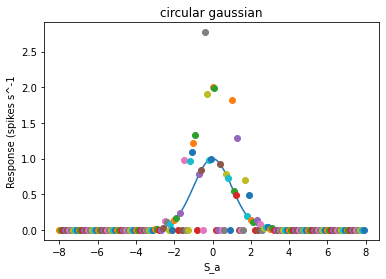

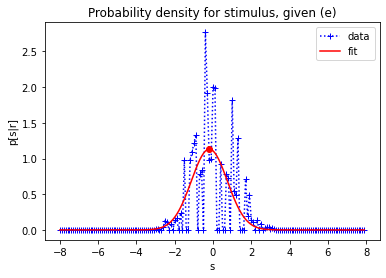

In [12]:
r_0 = 1
r_max = 1
sigma = 1
s = 0
s_max = 0

x = np.arange(-8, 8, 0.1)
y = r_max * np.exp(-(x-s_max)**2/2*sigma**2)
plt.plot(x, y)
s_max_list = []

for s_max in x: # loop over all s_max values of neurons
  y = (r_max * np.exp(-(s-s_max)**2/2*sigma**2)) * np.random.poisson()
  s_max_list.append(y)
  plt.plot(s_max, y, 'o')
plt.xlabel('S_a')
plt.ylabel('Response (spikes s^-1')
plt.title('circular gaussian')
plt.show()

mean = -2
variance = 1
y = s_max_list

def prob_dens(x, r_max, s_max, sigma):
    return r_max * np.exp(-(x - s_max)**2 / (2*sigma**2))

popt,pcov = curve_fit(prob_dens, x, y, p0=[max(y), mean, sigma])

x_plot = x
y_plot = prob_dens(x, *popt)
s_est = x[np.argmax(y_plot)]
y_max = y_plot.max()

plt.plot(x, y, 'b+:', label='data')
plt.plot(x_plot, y_plot, 'r-', label='fit')
plt.plot(s_est, y_max, 'ro')
plt.legend()
plt.title('Probability density for stimulus, given (e)')
plt.xlabel('s')
plt.ylabel('p[s|r]')
plt.show()

## 1.f
The accuracy of estimate $s_{est}$ compared to the real stimulus s can be described using, its bias $b_{est} (s)$ and its variance $\sigma^2_{est} (s)$

$b_{est}(s) = \langle s_{est} \rangle - s$

$\sigma^2_{est}(s) = \langle(s_{est} - \langle s_{est} \rangle)^2 \rangle$

The curves can be computed from the following equations: 

$ln p[s|\textbf{r}] = T\sum \limits^N_{a=1} r_a ln(f_a (s)) + lnp[s] + ....$

$f_a (s) = r_{max} exp(-\dfrac{1}{2}(\dfrac{s-s_a}{\sigma})^2)$

In [13]:
r_0 = 1
r_max = 1
sigma = 1
s = 0
s_max = 0
iterations = 100
x = np.arange(-8, 8, 0.1)

s_est_list = []
I_list = []

def dI(sigma, s, s_max, r_max):
  subpart1 = (s-s_max)
  subpart2 = (r_max * np.exp(-subpart1**2/2*sigma**2))
  I = (subpart1**2/(sigma**4)) * subpart2 
  return I

#I = dI(sigma, s, s_max, r_max)

for i in range(iterations):
  s_max_list = []

  for s_max in x: # loop over all s_max values of neurons
    y = (r_max * np.exp(-(s-s_max)**2/2*sigma**2)) * np.random.poisson()
    s_max_list.append(y)

  mean = -2
  variance = 1
  y = s_max_list

  def prob_dens(x, r_max, s_max, sigma):
    return r_max * np.exp(-(x - s_max)**2 / (2*sigma**2))

  popt,pcov = curve_fit(prob_dens, x, y, p0=[max(y), mean, sigma])

  x_plot = x
  y_plot = prob_dens(x, *popt)
  s_est = x[np.argmax(y_plot)]
  y_max = y_plot.max()

  s_est_list.append(s_est)
  I = dI(sigma, s_est, s_max, r_max)
  I_list.append(I)

/Users/arnediehl/opt/anaconda3/envs/nips/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [14]:
s_est_mean = sum(s_est_list) / len(s_est_list)
print(s_est_mean)

variance_list = []
for s_est in s_est_list:
  variance_list.append((s_est-s_est_mean)**2)

print('Values for which the variance of the estimator is not larger than 1/If(s): ')
print([i for i, j in zip(variance_list, I_list) if i < j])

print('bias=', s_est_mean - s)
var_est = sum(variance_list) / len(variance_list)
print('variance of the estimator=', var_est)
#print("\n Estimated covariance of popt \n", pcov)
#perr = np.sqrt(np.diag(pcov))
#print("Standard deviation errors on the parameters \n", perr)

-1.1530000000000242
Values for which the variance of the estimator is not larger than 1/If(s): 
[]
bias= -1.1530000000000242
variance of the estimator= 6.494490999999943


## 2.a
Correlation matrix: \\
$Q_{ij} = \sigma^2 \rho^{|i-j|}$

$\rho = exp(-\Delta/L)$
with $\Delta $distance between peaks of adjacent tuning curves. 

Fisher information: \\
$J(x) = f'(x)^TQ^{-1}(x)f'(x) + \dfrac{1}{2}Tr[Q'(x)Q^{-1}(x)Q'(x)Q^{-1}(x)]$

Where $Q'(x) = \dfrac{dQ(x)}{dx}$

And where $f'(x) = \dfrac{df(x)}{dx}$




In [15]:
'''
rho = 0
sigma = 0
x = 0
s_max = 0

Q = sigma**2 @ [[1, rho], [rho, 1]]

f_x = np.exp(-(x-s_max)**2/(2*sigma**2))

J_x = deriv(f_x).T * '''

'\nrho = 0\nsigma = 0\nx = 0\ns_max = 0\n\nQ = sigma**2 @ [[1, rho], [rho, 1]]\n\nf_x = np.exp(-(x-s_max)**2/(2*sigma**2))\n\nJ_x = deriv(f_x).T * '

## 2.b 
Notice that we will now assume that Q will be independent of x, so for instance the case of additive noise as stated in Gielen. Now we can rewrite J(x) to see what happens in our case. 

$J(x) = f'(x)^TQ^{-1}(x)f'(x) + \dfrac{1}{2}Tr[Q'(x)Q^{-1}(x)Q'(x)Q^{-1}(x)]$

And then we notice $Q'(x)=0$, due to reasons stated above. So now we need $f'(x)$ (notice that we used the definition for a vector derivative as a component-wise derivative). Then we can proceed:

$\dfrac{df(x)}{dx} =  \begin{bmatrix} dx_1/dx_1 \\ dx_2/dx_2 \end{bmatrix} =  \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ And we also need the inverse matrix for Q.

$Q^-1 = \dfrac{1}{\sigma^4 * (1-\rho^2)} \begin{bmatrix} \sigma^2 & -\sigma^2*\rho \\ -\sigma^2*\rho&\sigma^2 \end{bmatrix}$

Now using all of the above we can get the Fisher information for this system: 

$J(x) = f'(x)^TQ^{-1}(x)f'(x) = \begin{bmatrix} 1 \\ 1 \end{bmatrix}^{T} \dfrac{1}{\sigma^4 * (1-\rho^2)} \begin{bmatrix} \sigma^2 & -\sigma^2*\rho \\ -\sigma^2*\rho&\sigma^2 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \dfrac{1}{\sigma^4 * (1-\rho^2)} * \begin{bmatrix} \sigma^2  -\sigma^2*\rho \\ -\sigma^2*\rho + \sigma^2 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \dfrac{1}{\sigma^4 * (1-\rho)(1+\rho)} * \sigma^2 * (1-\rho) = \dfrac{1}{\sigma^2 * (1+\rho)}$

From the above we do indeed see a singularity for $\rho \rightarrow -1$. For $\rho=0$ we get a twice as large Fisher information as for $\rho=1$, and in the neighborhood of $\rho=-1$ we see that the Fisher information blows up to $\infty$ when we approach the limit from above, and that the Fisher information drops to $-\infty$ when we approach the limit from below. 

We can now have a look at the eigenvalues: $det \begin{bmatrix} \sigma^2 *(1-\lambda) & \sigma^2*\rho \\ \sigma^2*\rho&\sigma^2(1-\lambda) \end{bmatrix} =0 \rightarrow \sigma^2*(\lambda^2 -2*\lambda + 1 -\rho^2)=0 \rightarrow \lambda = \dfrac{2\pm\sqrt{4*\rho^2*\sigma^4}}{2} =1 \pm \rho*\sigma^2$

Now we can calculate the eigenvectors: $\begin{bmatrix} \sigma^2 *(1-\lambda) & \sigma^2*\rho \\ \sigma^2*\rho&\sigma^2(1-\lambda) \end{bmatrix} \cdot \vec{v}= \begin{bmatrix} \sigma^2 *(1-(1\pm\rho\sigma^2)) & \sigma^2*\rho \\ \sigma^2*\rho&\sigma^2(1-(1\pm\rho\sigma^2)) \end{bmatrix} \cdot \vec{v} = \begin{bmatrix} \sigma^2 *\mp\rho\sigma^2 & \sigma^2*\rho \\ \sigma^2*\rho&\sigma^2 *\mp\rho\sigma^2 \end{bmatrix} \cdot \begin{bmatrix} x \\ y \end{bmatrix} = \vec{0} \rightarrow \sigma^2 *(\mp\rho\sigma^2 * x + \rho * y)=0$

$\& \sigma^2 *(\mp\rho\sigma^2 * y + \rho * x)=0 \rightarrow \pm \sigma^2*\rho*x=\rho*y$, which we plug into the other equation to get:  $ \mp\rho*\sigma^2*(\pm\sigma^2*x)+\rho*x=\rho(x-\sigma^4*x)=0 $, from which we see that if $\sigma\approx1$ then x can be any number, so we choose 1. From this we get that $y= \pm 1$ (notice that we still use $\sigma\approx 1$). 

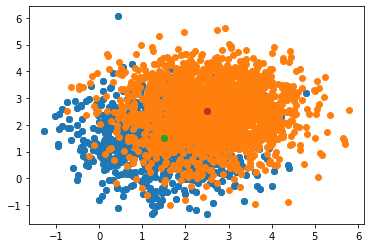

In [16]:
stim1=1.5
stim2=2.5
cov1=((1,1),(1,1))
mean1=(1.5,1.5) 
cov2=((1,.25),(.25,1))
mean2=(2.5,2.5)
  
plt.figure(1)
plt.scatter(np.random.multivariate_normal(mean1, cov1, 1000),np.random.multivariate_normal(mean1, cov1, 1000))
plt.scatter(np.random.multivariate_normal(mean2, cov2, 1000),np.random.multivariate_normal(mean2, cov2, 1000))
plt.scatter(mean1,mean1)
plt.scatter(mean2,mean2)

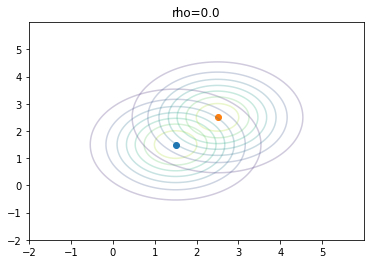

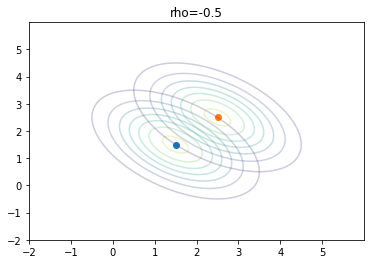

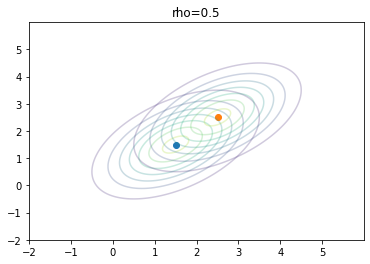

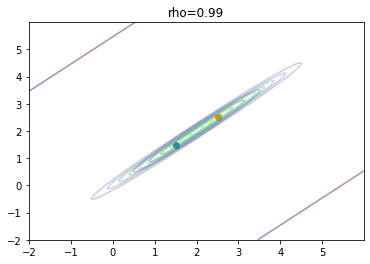

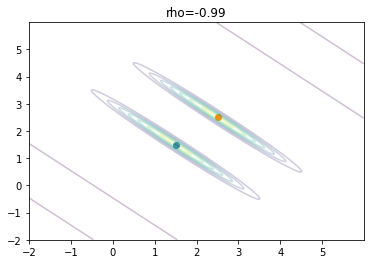

In [17]:
from scipy.stats import multivariate_normal
rho=[0.0,-0.5, 0.5, 0.99, -0.99]
def gauss2d(rho):
  x, y = np.mgrid[-2:6:.01, -2:6:.01]
  pos = np.empty(x.shape + (2,))
  pos[:, :, 0] = x; pos[:, :, 1] = y
  cov1=[[1.0, rho], [rho,1.0]]
  mean1=[1.5, 1.5]
  gauss = multivariate_normal(mean1, cov1)
  mean2=[2.5, 2.5]
  cov2=[[1.0, rho], [rho,1.0]]
  gauss2 = multivariate_normal(mean2, cov2)
  plt.figure()
  plt.contour(x, y, gauss.pdf(pos), alpha=.25)
  plt.contour(x, y, gauss2.pdf(pos), alpha=.25)
  plt.title('rho=' + str(rho))
  plt.scatter(mean1[0], mean1[1], alpha=1.0)
  plt.scatter(mean2[0], mean2[1], alpha=1.0)
  return
gauss2d(rho[0])

gauss2d(rho[1])

gauss2d(rho[2])

gauss2d(rho[3])

gauss2d(rho[4])

We see that indeed $\rho$ has an influence on the overlap between the two 2D gaussians. Note that the most negative -0.99 tried $\rho$ had the least overlap, and for $\rho\approx1$ we saw nearly 100% overlap.